In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, StandardScaler
from pandas.core.internals.construction import dataclasses_to_dicts
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,  RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
import plotly.express as px
import statsmodels
from scipy.stats import norm

In [79]:
df=pd.read_csv('secondary_data.csv', sep=';')

In [80]:
pd.set_option('display.max_columns', None)
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [82]:
df['veil-type']=df['veil-type'].fillna(0)

In [83]:
#df.drop(['stem-color','veil-color','veil-type','spore-print-color'], axis=1, inplace=True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             61069 non-null  object 
 15  veil-color         

In [85]:
df['veil-type'] = df['veil-type'].replace({'u': 1})

In [86]:
df=df.rename(columns={'cap-diameter':'cap_diameter'})
df=df.rename(columns={'cap-shape':'cap_shape'})
df=df.rename(columns={'cap-surface':'cap_surface'})
df=df.rename(columns={'cap-color':'cap_color'})
df=df.rename(columns={'does-bruise-or-bleed':'does_bruise_or_bleed'})
df=df.rename(columns={'gill-attachment':'gill_attachment'})
df=df.rename(columns={'gill-spacing':'gill_spacing'})
df=df.rename(columns={'gill-color':'gill_color'})
df=df.rename(columns={'stem-height':'stem_height'})
df=df.rename(columns={'stem-root':'stem_root'})
df=df.rename(columns={'stem-surface':'stem_surface'})
df=df.rename(columns={'has-ring':'has_ring'})
df=df.rename(columns={'ring-type':'ring_type'})
df=df.rename(columns={'veil-type':'veil_type'})
df=df.rename(columns={'spore-print-color':'spore_print_color'})

In [87]:
df['veil_type'] = df['veil_type'].astype(float)

In [88]:
df['class'] = df['class'].replace({'e': 1, 'p':0})

In [89]:
df['class'] = df['class'].astype(float)

In [90]:
set(df['stem_root'])

{'b', 'c', 'f', nan, 'r', 's'}

In [91]:
set(df['stem_surface'])

{'f', 'g', 'h', 'i', 'k', nan, 's', 't', 'y'}

In [92]:
set(df['ring_type'])

{'e', 'f', 'g', 'l', 'm', nan, 'p', 'r', 'z'}

In [93]:
set(df['has_ring'])

{'f', 't'}

In [94]:
df['has_ring'] = df['has_ring'].replace({'f': 0, 't':1}).astype(float)

In [95]:
set(df['has_ring'])

{0.0, 1.0}

In [96]:
set(df['gill_color'])

{'b', 'e', 'f', 'g', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y'}

In [97]:
df.drop(['spore_print_color'], axis=1, inplace=True)

In [98]:
df['does_bruise_or_bleed'] = df['does_bruise_or_bleed'].replace({'f': 1, 't':2}).astype(float)

In [99]:
corr=df.corr()

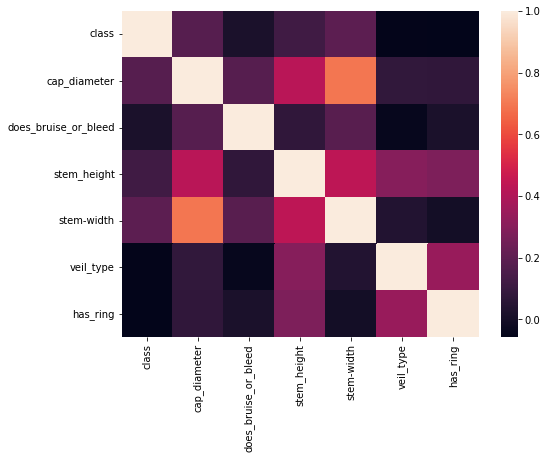

In [100]:
plt.figure(figsize=(8,6))
sns.heatmap(corr)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  float64
 1   cap_diameter          61069 non-null  float64
 2   cap_shape             61069 non-null  object 
 3   cap_surface           46949 non-null  object 
 4   cap_color             61069 non-null  object 
 5   does_bruise_or_bleed  61069 non-null  float64
 6   gill_attachment       51185 non-null  object 
 7   gill_spacing          36006 non-null  object 
 8   gill_color            61069 non-null  object 
 9   stem_height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem_root             9531 non-null   object 
 12  stem_surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil_type             61069 non-null  float64
 15  veil-color         

In [102]:
set(df['stem_root'])

{'b', 'c', 'f', nan, 'r', 's'}

In [103]:
df.stem_root.value_counts()

s    3177
b    3177
r    1412
f    1059
c     706
Name: stem_root, dtype: int64

In [124]:
class0=df[df['class']==0]

In [125]:
class0['ring_type'].value_counts()

f    27887
z     2118
e     1376
p      717
r      706
l      550
g      534
Name: ring_type, dtype: int64

In [126]:
class1['ring_type'].value_counts()

f    22945
e     1059
l      877
g      706
r      693
p      548
m      353
Name: ring_type, dtype: int64

In [123]:
class1=df[df['class']==1]

In [108]:
df.drop(['stem_root'], axis=1, inplace=True)

In [109]:
class0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33888 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 33888 non-null  float64
 1   cap_diameter          33888 non-null  float64
 2   cap_shape             33888 non-null  object 
 3   cap_surface           26475 non-null  object 
 4   cap_color             33888 non-null  object 
 5   does_bruise_or_bleed  33888 non-null  float64
 6   gill_attachment       27534 non-null  object 
 7   gill_spacing          19768 non-null  object 
 8   gill_color            33888 non-null  object 
 9   stem_height           33888 non-null  float64
 10  stem-width            33888 non-null  float64
 11  stem_root             6001 non-null   object 
 12  stem_surface          14473 non-null  object 
 13  stem-color            33888 non-null  object 
 14  veil_type             33888 non-null  float64
 15  veil-color         

In [110]:
set(df['gill_spacing'])

{'c', 'd', 'f', nan}

In [111]:
df.gill_spacing.value_counts()

c    24710
d     7766
f     3530
Name: gill_spacing, dtype: int64

In [112]:
class0.head()

,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,stem-width,stem_root,stem_surface,stem-color,veil_type,veil-color,has_ring,ring_type,habitat,season
0,0.0,15.26,x,g,o,1.0,e,NaN,w,16.95,17.09,s,y,w,1.0,w,1.0,g,d,w
1,0.0,16.60,x,g,o,1.0,e,NaN,w,17.99,18.19,s,y,w,1.0,w,1.0,g,d,u
2,0.0,14.07,x,g,o,1.0,e,NaN,w,17.80,17.74,s,y,w,1.0,w,1.0,g,d,w
3,0.0,14.17,f,h,e,1.0,e,NaN,w,15.77,15.98,s,y,w,1.0,w,1.0,p,d,w
4,0.0,14.64,x,h,o,1.0,e,NaN,w,16.53,17.20,s,y,w,1.0,w,1.0,p,d,w


In [113]:
df['gill_spacing']=df['gill_spacing'].fillna(0)

In [114]:
df['gill_spacing'] = df['gill_spacing'].replace({0: 'f'})

In [142]:
df2=df

In [116]:
cap_color_onehot=pd.get_dummies(df['cap_color'])

In [143]:
df2 = pd.concat([df2,cap_color_onehot ], axis=1)

In [119]:
df['ring_type']=df['ring_type'].fillna(0).replace({0: 'f'})

In [120]:
df.ring_type.value_counts()

f    50832
e     2435
z     2118
l     1427
r     1399
p     1265
g     1240
m      353
Name: ring_type, dtype: int64

In [144]:
df2.head()

,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,stem-width,stem-color,veil_type,has_ring,ring_type,habitat,season,b,e,g,k,l,n,o,p,r,u,w,y
0,0.0,15.26,x,g,o,1.0,e,f,w,16.95,17.09,w,1.0,1.0,g,d,w,0,0,0,0,0,0,1,0,0,0,0,0
1,0.0,16.60,x,g,o,1.0,e,f,w,17.99,18.19,w,1.0,1.0,g,d,u,0,0,0,0,0,0,1,0,0,0,0,0
2,0.0,14.07,x,g,o,1.0,e,f,w,17.80,17.74,w,1.0,1.0,g,d,w,0,0,0,0,0,0,1,0,0,0,0,0
3,0.0,14.17,f,h,e,1.0,e,f,w,15.77,15.98,w,1.0,1.0,p,d,w,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,14.64,x,h,o,1.0,e,f,w,16.53,17.20,w,1.0,1.0,p,d,w,0,0,0,0,0,0,1,0,0,0,0,0


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  float64
 1   cap_diameter          61069 non-null  float64
 2   cap_shape             61069 non-null  object 
 3   cap_surface           46949 non-null  object 
 4   cap_color             61069 non-null  object 
 5   does_bruise_or_bleed  61069 non-null  float64
 6   gill_attachment       51185 non-null  object 
 7   gill_spacing          61069 non-null  object 
 8   gill_color            61069 non-null  object 
 9   stem_height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem_surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  veil_type             61069 non-null  float64
 14  veil-color            7413 non-null   object 
 15  has_ring           

In [130]:
df.drop(['veil-color', 'stem_surface'], axis=1, inplace=True)

In [131]:
set(df['habitat'])

{'d', 'g', 'h', 'l', 'm', 'p', 'u', 'w'}

In [132]:
set(df['season'])

{'a', 's', 'u', 'w'}

In [133]:
df.season.value_counts()

a    30177
u    22898
w     5267
s     2727
Name: season, dtype: int64

In [134]:
seson_onehot=pd.get_dummies(df['season'])

In [145]:
df2 = pd.concat([df2,seson_onehot ], axis=1)

In [139]:
df2=df2.dropna(subset=['cap_surface'])#zmniejszenie zbioru

In [138]:
habitat_onehot=pd.get_dummies(df['habitat'])

In [146]:
df2 = pd.concat([df2,habitat_onehot ], axis=1)

In [147]:
df2

,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,stem-width,stem-color,veil_type,has_ring,ring_type,habitat,season,b,e,g,k,l,n,o,p,r,u,w,y,a,s,u,w,d,g,h,l,m,p,u,w
0,0.0,15.26,x,g,o,1.0,e,f,w,16.95,17.09,w,1.0,1.0,g,d,w,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,0.0,16.60,x,g,o,1.0,e,f,w,17.99,18.19,w,1.0,1.0,g,d,u,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,0.0,14.07,x,g,o,1.0,e,f,w,17.80,17.74,w,1.0,1.0,g,d,w,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0.0,14.17,f,h,e,1.0,e,f,w,15.77,15.98,w,1.0,1.0,p,d,w,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0.0,14.64,x,h,o,1.0,e,f,w,16.53,17.20,w,1.0,1.0,p,d,w,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0.0,1.18,s,s,y,1.0,f,f,f,3.93,6.22,y,0.0,0.0,f,d,a,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0
61065,0.0,1.27,f,s,y,1.0,f,f,f,3.18,5.43,y,0.0,0.0,f,d,a,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0
61066,0.0,1.27,s,s,y,1.0,f,f,f,3.86,6.37,y,0.0,0.0,f,d,u,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
61067,0.0,1.24,f,s,y,1.0,f,f,f,3.56,5.44,y,0.0,0.0,f,d,u,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
